In [1]:
import numpy as np
import matplotlib.pyplot as plt


loaded_data = np.load('results/langzhou_data.npz')
#dp_p_list = loaded_data['dp_p_list']
delta    = loaded_data['delta']
excited = loaded_data['excited']
state = loaded_data['state']
x = loaded_data['x']*1e3
time = loaded_data['time']

excited=state==2

delta_std = np.std(delta, axis=1)

fraction_excited=[]
for i in range(len(excited)):
    fraction_excited.append(100*sum(excited[i])/len(excited[i]))

# revolution_frequency = 200*1e6
# s_per_turn = 1/revolution_frequency
# num_turns=time/s_per_turn


plot histogram at last turn

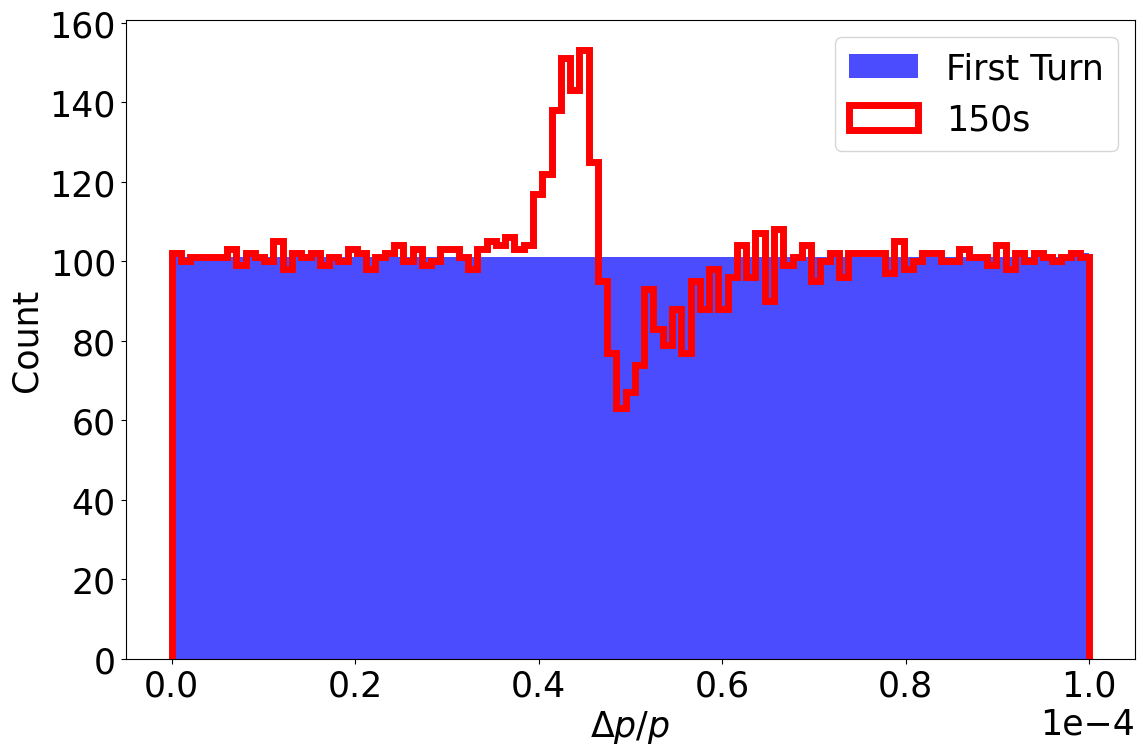

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Extract delta at the first turn (assuming the first turn is at index 0)
delta_first_turn = delta[0, :]

# Extract delta at the final turn
delta_final_turn = delta[-1, :]
min_delta=min(delta_final_turn)
max_delta=max(delta_final_turn)
bins = np.linspace(min_delta, max_delta, 100)
# Plotting for final turn
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='150s', histtype='step', linewidth=5)
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.tight_layout()
plt.show()

plot with the lorentzian

4.6524550524550525e-05


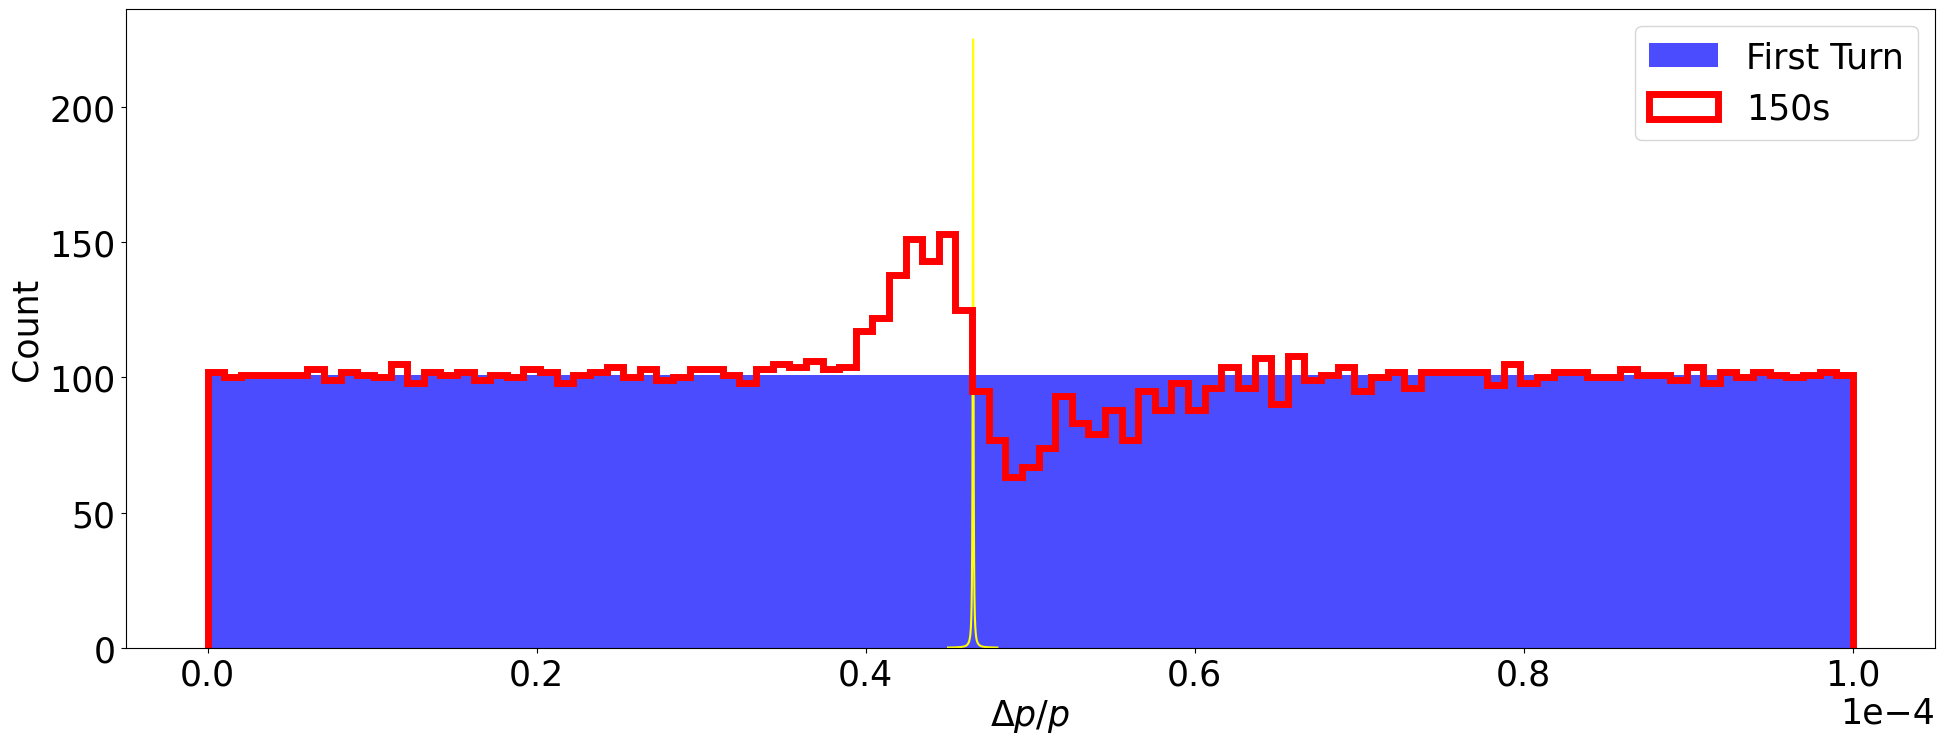

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=2.213116311631163e-07
ion_excitation_energy=hw0

axis=1e-1
mid=0


delta_range=np.linspace(mid-axis,mid+axis,int(1e7))
delta_range=np.linspace(4.5e-05,4.8e-5,int(1e6))

K1 = 1


pc = p0c*(1.0+delta_range)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


ratio_ΔΓ_range = DeltaDetuning/gamma_decay


# Calculate the heatmap values using the equation
excitation_prob = 0.5*K1 / ((4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1))

max_prob = np.max(excitation_prob)
max_prob_index = np.argmax(excitation_prob)

# Find the corresponding delta value
corresponding_max_delta = delta_range[max_prob_index]

print(corresponding_max_delta)

# Create the heatmap
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(delta_range,excitation_prob*9e2,color='yellow')
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='150s', histtype='step', linewidth=5)
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.tight_layout()
plt.show()


Highest bin value for the final turn: 4.494949494949495e-05
Height of the highest bin for the final turn: 153

Minimum bin value for the final turn: 4.898989898989899e-05
Height of the minimum bin for the final turn: 63

Bin value with height 126.5: 4.595959595959596e-05
Height of the bin with height 126.5: 125
----------------------------------------------------------------------------
Bin value with height 81.5: 5.3030303030303025e-05
Height of the bin with height 81.5: 83

FWHM_max: 1.010101010101012e-06
FWHM_min: 4.0404040404040344e-06


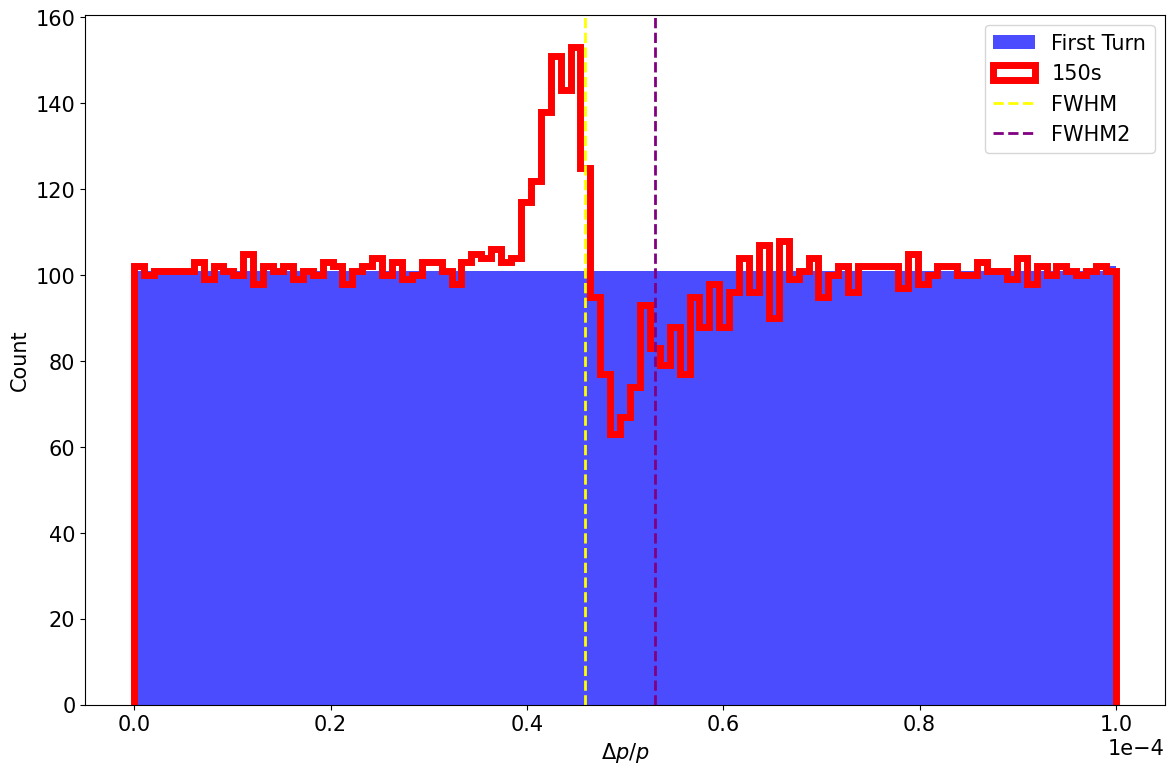

In [4]:

# Extract delta at the final turn
delta_final_turn = delta[-1, :]
num_bins=100
baseline=1e4/num_bins
bins = np.linspace(0e-4, 1e-4, num_bins)

# Calculate the histogram for the final turn
hist_final_turn, bin_edges_final_turn = np.histogram(delta_final_turn, bins=bins)

# Find the index of the highest count bin for the final turn
index_max_bin_final_turn = np.argmax(hist_final_turn)

# Get the corresponding bin value and count for the highest bin
max_bin_value_final_turn = (bin_edges_final_turn[index_max_bin_final_turn] + bin_edges_final_turn[index_max_bin_final_turn + 1]) / 2
max_bin_count_final_turn = hist_final_turn[index_max_bin_final_turn]

print(f'Highest bin value for the final turn: {max_bin_value_final_turn}')
print(f'Height of the highest bin for the final turn: {max_bin_count_final_turn}\n')

# Find the index of the minimum count bin for the final turn
index_min_bin_final_turn = np.argmin(hist_final_turn)

# Get the corresponding bin value and count for the minimum bin
min_bin_value_final_turn = (bin_edges_final_turn[index_min_bin_final_turn] + bin_edges_final_turn[index_min_bin_final_turn + 1]) / 2
min_bin_count_final_turn = hist_final_turn[index_min_bin_final_turn]

print(f'Minimum bin value for the final turn: {min_bin_value_final_turn}')
print(f'Height of the minimum bin for the final turn: {min_bin_count_final_turn}\n')

################################################################################################################

desired_height = (max_bin_count_final_turn-baseline)/2+baseline

# Find the index of the bin with the closest height to the desired value
index_desired_height = np.argmin(np.abs(hist_final_turn - desired_height))

# Get the corresponding bin value and count for the bin with the desired height
desired_bin_value = (bin_edges_final_turn[index_desired_height] + bin_edges_final_turn[index_desired_height + 1]) / 2
desired_bin_count = hist_final_turn[index_desired_height]

print(f'Bin value with height {desired_height}: {desired_bin_value}')
print(f'Height of the bin with height {desired_height}: {desired_bin_count}')
print(f'----------------------------------------------------------------------------')

#################################################################################################################

# Instead of desired_height2
desired_height_min_bin = (min_bin_count_final_turn - baseline) / 2 + baseline

# Instead of index_desired_height2
index_desired_height_min_bin = np.argmin(np.abs(hist_final_turn - desired_height_min_bin))

# Instead of desired_bin_value2
desired_bin_value_min_bin = (bin_edges_final_turn[index_desired_height_min_bin] + bin_edges_final_turn[index_desired_height_min_bin + 1]) / 2

# Instead of desired_bin_count2
desired_bin_count_min_bin = hist_final_turn[index_desired_height_min_bin]

print(f'Bin value with height {desired_height_min_bin}: {desired_bin_value_min_bin}')
print(f'Height of the bin with height {desired_height_min_bin}: {desired_bin_count_min_bin}\n')

print('FWHM_max:',abs(max_bin_value_final_turn-desired_bin_value))
print('FWHM_min:',abs(min_bin_value_final_turn-desired_bin_value_min_bin))

# Plotting for the final turn
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15})  # Adjust the font size if needed
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='150s', histtype='step', linewidth=5)
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.tight_layout()

# # Highlight the highest bin
# plt.axvline(max_bin_value_final_turn, color='red', linestyle='--', linewidth=2, label='Max Bin (Final Turn)')

# # Highlight the bin with the desired height
# plt.axvline(min_bin_value_final_turn, color='blue', linestyle='--', linewidth=2, label='Min Bin (Final Turn)')

plt.axvline(desired_bin_value, color='yellow', linestyle='--', linewidth=2, label='FWHM')


plt.axvline(desired_bin_value_min_bin, color='purple', linestyle='--', linewidth=2, label='FWHM2')

plt.legend()
plt.show()


Make Schottky plots

In [7]:
# Note, within n*emittance, one have n_% of particles where
#  n=1; n_% = 39%
#  n=2; n_% = 63%
#  n=4; n_% = 87%
#  n=6; n_% = 95%
n_part = int(1e4)
# sigma_dp = 1e-4 # relative ion momentum spread
# Let's consider 95% of particles, i.e. n=6 for transverse action, and n=2 for abs dp/p
n_bins = 100

# bins_x  = gemitt_x*np.linspace(0,7,n_bins+1)
# bins_y  = gemitt_y*np.linspace(0,7,n_bins+1)
bins_dp = np.linspace(min_delta,max_delta,n_bins+1)
# bins_dp = sigma_dp*np.linspace(-9.2*1e-5,,n_bins+1)
# hist_x  = bins_x[0:] + ( bins_x[1] -  bins_x[0])/2
# hist_y  = bins_y[0:] + ( bins_y[1] -  bins_y[0])/2
hist_dp = bins_dp[0:]+ (bins_dp[1] - bins_dp[0])/2
all_hist_x  = np.zeros((len(time), n_bins))
all_hist_y  = np.zeros((len(time), n_bins))
all_hist_dp = np.zeros((len(time), n_bins))
all_found_x = np.zeros((len(time)))
all_found_y = np.zeros((len(time)))
all_found_dp = np.zeros((len(time)))

for i_turn in np.arange(len(time)): 
    #all_hist_x[i_turn,:], _  = np.histogram(action_x[i_turn,:],      bins=bins_x,  density=False, weights=None)
    #all_hist_y[i_turn,:], _  = np.histogram(action_y[i_turn,:],      bins=bins_y,  density=False, weights=None)
    all_hist_dp[i_turn,:], _ = np.histogram((delta[i_turn,:]), bins=bins_dp, density=False, weights=None)

    # _aux = np.where(np.cumsum(all_hist_x[i_turn,:]/n_part) > 0.95)[0]
    # if len(_aux) > 0:
    #     all_found_x[i_turn] = hist_x[_aux[0]]
    # else:
    #     all_found_x[i_turn] = hist_x[-1]
    
    # _aux = np.where(np.cumsum(all_hist_y[i_turn,:]/n_part) > 0.95)[0]
    # if len(_aux) > 0:
    #     all_found_y[i_turn] = hist_y[_aux[0]]
    # else:
    #     all_found_y[i_turn] = hist_y[-1]

    _aux = np.where(np.cumsum(all_hist_dp[i_turn,:]/n_part) > 0.95)[0]
    if len(_aux) > 0:
        all_found_dp[i_turn] = hist_dp[_aux[0]]
    else:
        all_found_dp[i_turn] = hist_dp[-1]



def imagesc(im, x = None, y = None, **kwargs):
    """
    Wrapper for PyPlot's `imshow` to imitate Matlab-style IMAGESC.

    `imagesc(z; x, y)` treats `z` as a 2D array to visualize, with `x` giving pixel coordinates
    across a row and `y` giving pixel columns *down* a column.

    Omitting `x` and/or `y` implies `1:size(z, 2)` and `1:size(z, 1)` respectively.

    PyPlot will show the image using a carefully-constructed call to `PyPlot.imshow` where:
    - the extent is carefully initialized so the plot's ticks line up exactly with `x` and `y`
    - the origin is at the lower-left of the window
    - the aspect ratio is fluid (uses the full window)
    - no interpolation is applied.
    """
    if x is None:
        x = np.arange(np.shape(im)[1])
    if y is None:
        y = np.arange(np.shape(im)[0])

    def _extents(f):
        delta = f[2] - f[1]
        return [f[1] - delta / 2, f[-1] + delta / 2]
    plt.imshow(im, extent=(_extents(x)[0], _extents(x)[-1], _extents(y)[0],  _extents(y)[-1]), cmap = 'RdBu_r',aspect="auto", origin="lower", interpolation="none", **kwargs)
 

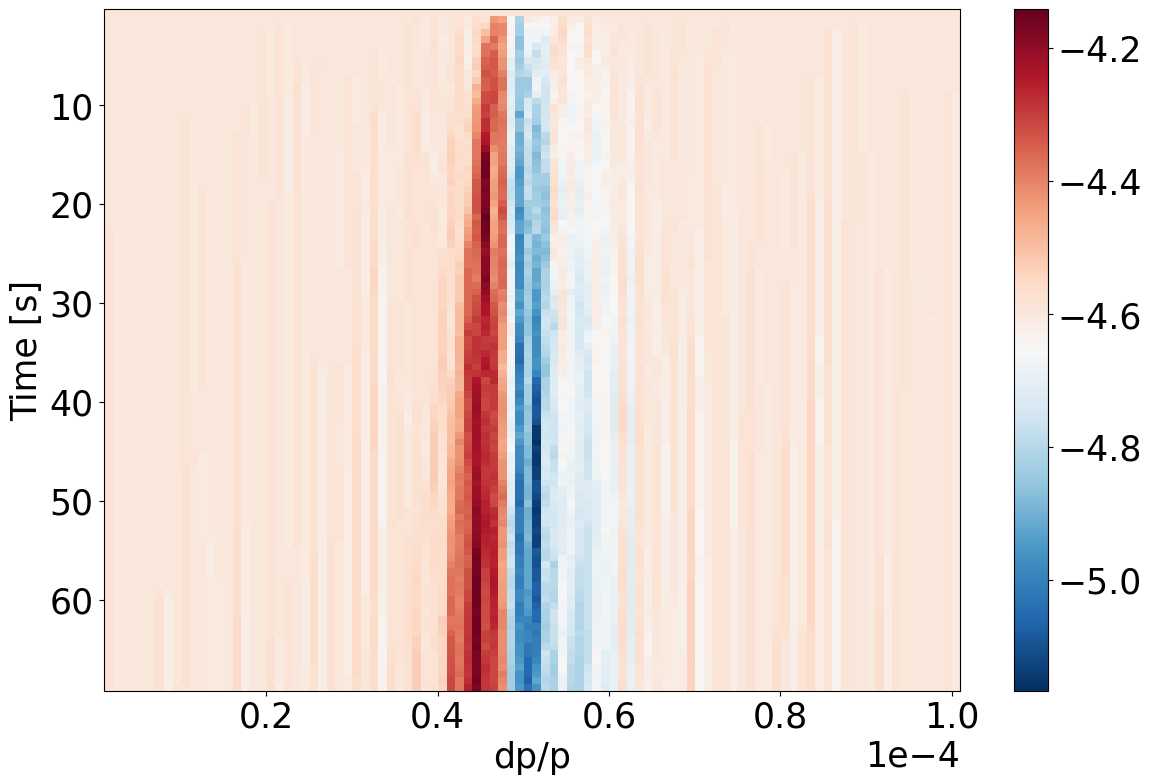

In [8]:

# Create the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot the data on the primary y-axis
imagesc(np.log((all_hist_dp+1)/n_part), hist_dp, time)
plt.colorbar()
plt.tight_layout()

# Customize the primary y-axis and labels
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax1.set_xlabel('dp/p')
ax1.set_ylabel('Time [s]')

# Invert the y-axis
ax1.invert_yaxis()

plt.show()